## Uppgift 1

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

covid_data = pd.read_excel("./data/Folkhalsomyndigheten_Covid19.xlsx", sheet_name="Veckodata Riket")

# Creates a new column named "Vecka" with the values of "år" and "veckonummer" as string and adds a "v" inbetween.
covid_data["Vecka"] = covid_data["år"].astype(str) + "v" + covid_data["veckonummer"].astype(str)

# Removes the now unneeded calumns of "år" and "veckonummer", inplace=True makes it so it changes the original dataframe instead of creating a new copy.
covid_data.drop(columns=["år", "veckonummer"], inplace=True)

In [3]:
covid_data.head(3)

,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv,Vecka
0,1,0,0,1,0,0,0,0,0.0,0,0.0,2020v6
1,0,0,0,1,0,0,0,0,0.0,0,0.0,2020v7
2,0,0,0,1,0,0,0,0,0.0,0,0.0,2020v8


In [4]:
covid_data.describe()

,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
count,142.000000,142.000000,142.000000,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,18378.345070,177.197183,354.169014,1.125288e+06,10843.281690,67.176056,6000.464789,144.936620,14.000000,12321.154930,1187.840841
std,38569.455753,371.689114,725.677174,9.618084e+05,9265.100705,73.435000,3076.853993,173.659331,16.796551,6103.235009,587.255605
min,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3075.000000,30.000000,59.750000,1.014860e+05,982.500000,14.000000,2643.750000,25.250000,2.425000,5880.000000,569.375000
50%,5531.000000,53.000000,107.500000,1.085848e+06,10461.500000,27.500000,7559.500000,77.500000,7.450000,14610.500000,1407.650024
75%,21125.000000,203.500000,421.250000,2.423603e+06,23350.500000,109.000000,8863.250000,185.500000,17.950000,17177.750000,1654.999969
max,265043.000000,2554.000000,5024.000000,2.609725e+06,25144.000000,289.000000,9539.000000,664.000000,64.300003,20581.000000,1982.900024


<function matplotlib.pyplot.show(close=None, block=None)>

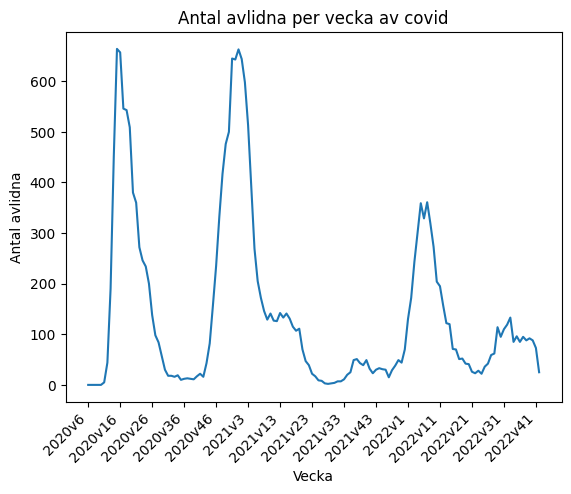

In [5]:
lineplot = sns.lineplot(data=covid_data, x="Vecka", y="Antal_avlidna_vecka" )

# rotated the the text for the x axis variables for better readability.
plt.xticks(rotation=45, ha="right")

#I used matplotlib's get_xticks to get the current values on x as an array and then set the new x axis to every tenth value for better readability.
lineplot.set_xticks(lineplot.get_xticks()[::10])

plt.title("Antal avlidna per vecka av covid")
plt.xlabel("Vecka")
plt.ylabel("Antal avlidna")

plt.savefig("./Visualiseringar/Antal_avlidna_vecka.png")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

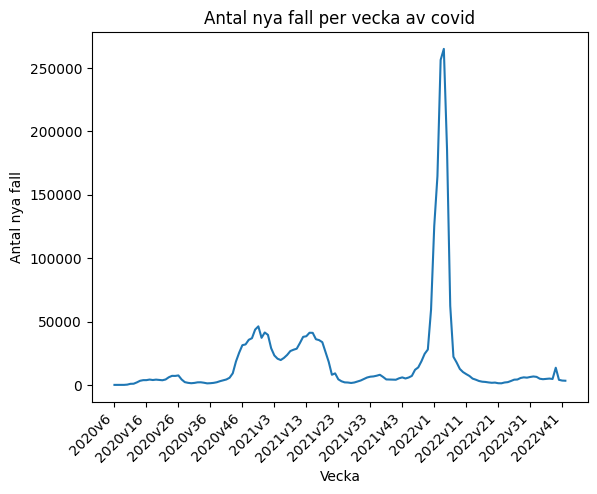

In [6]:
lineplot = sns.lineplot(data=covid_data, x="Vecka", y="Antal_fall_vecka" )

plt.xticks(rotation=45, ha="right")

lineplot.set_xticks(lineplot.get_xticks()[::10])

plt.title("Antal nya fall per vecka av covid")
plt.xlabel("Vecka")
plt.ylabel("Antal nya fall")

plt.savefig("./Visualiseringar/Antal_fall_vecka.png")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

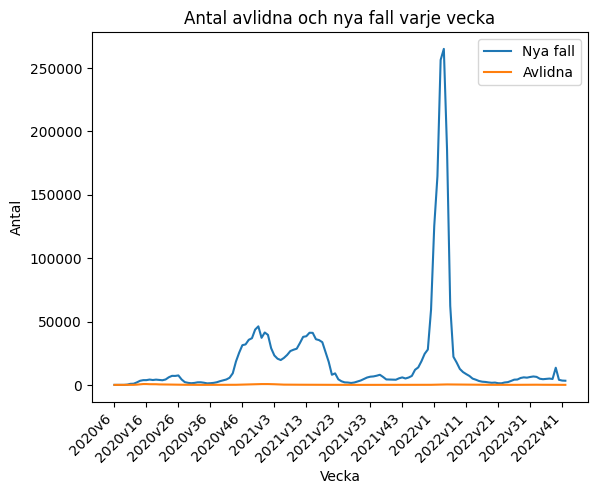

In [7]:
lineplot = sns.lineplot(data=covid_data, x="Vecka", y="Antal_fall_vecka", label="Nya fall")
lineplot = sns.lineplot(data=covid_data, x="Vecka", y="Antal_avlidna_vecka", label="Avlidna")

plt.xticks(rotation=45, ha="right")

# gca = Get current axes plotted
plt.gca().set_xticks(plt.gca().get_xticks()[::10])

plt.title("Antal avlidna och nya fall varje vecka")
plt.xlabel("Vecka")
plt.ylabel("Antal")

plt.savefig("./Visualiseringar/både_fall_avlidna_vecka.png")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

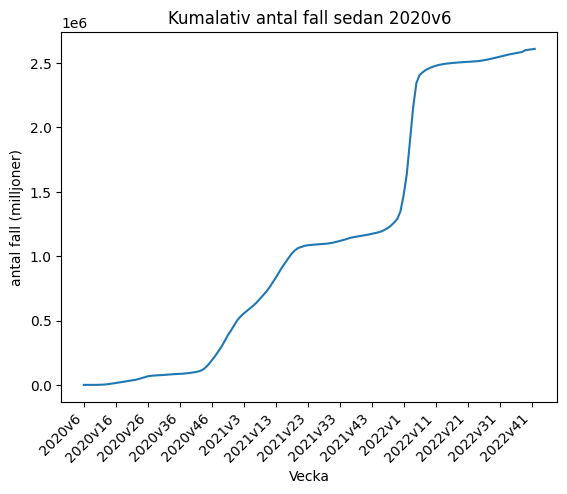

In [8]:
lineplot = sns.lineplot(data=covid_data, x="Vecka", y="Kum_antal_fall" )

plt.xticks(rotation=45, ha="right")

lineplot.set_xticks(lineplot.get_xticks()[::10])

plt.title("Kumalativ antal fall sedan 2020v6")
plt.xlabel("Vecka")
plt.ylabel("antal fall (milljoner)")

plt.savefig("./Visualiseringar/Kum_antal_fall_vecka.png")

plt.show

## Uppgift 2

In [12]:
vaccine_data = pd.read_excel("./data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Vaccinerade kommun och ålder")

# Using nunique to count the amount of unique values in the column
number_of_län = vaccine_data["Län_namn"].nunique()
number_of_kommun = vaccine_data["Kommun_namn"].nunique()

total_population_data = vaccine_data["Befolkning"].sum()
twelve_seventeen_data = vaccine_data[(vaccine_data["Ålder"] == "12-15") | (vaccine_data["Ålder"] == "16-17")]
twelve_seventeen_population = twelve_seventeen_data["Befolkning"].sum()
total_population = 10545300 # Population as of 06/23 according to SCB

adult_population = total_population_data - twelve_seventeen_population

Kids_population = total_population - adult_population

print(f"How many different län are respresented in the data: {number_of_län}")
print()
print(f"How many different kommun are respresented in the data: {number_of_kommun}")
print()
print(f"Population present in the data: {total_population_data}")
print()
print(f"Population of people aged 17 and under: {Kids_population}")

How many different län are respresented in the data: 21

How many different kommun are respresented in the data: 290

Population present in the data: 9092790

Population of people aged 17 and under: 2197880


In [22]:
eleven_younger = Kids_population - twelve_seventeen_population
ages_data = vaccine_data.groupby("Ålder")["Befolkning"].sum().reset_index()

# Created a new row to be added to the ages_data dataframe
eleven_grouping = {"Ålder": "11 eller yngre", "Befolkning": eleven_younger}

# Adds the new row to index position -1 which is the last one in the dataframe
ages_data.loc[-1] = eleven_grouping
# Adds 1 to ever index and resorts the index to move "11 eller yngre" to the top of the dataframe
ages_data.index = ages_data.index + 1
ages_data = ages_data.sort_index()

age_groups_diagram = px.bar(ages_data, x="Ålder", y="Befolkning", title="Population by age group")

age_groups_diagram.write_html("./Visualiseringar/Age_group_diagram.html")

age_groups_diagram